In [2]:
from matplotlib import pyplot as plt
from scipy.optimize import fmin_l_bfgs_b
import numpy as np
from keras import backend as K

Using TensorFlow backend.


In [5]:
from keras.models import load_model
AM = load_model('face_gen.h5')

/home/konrad/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [6]:
Gen = AM.get_layer("sequential_1")

## Face 1

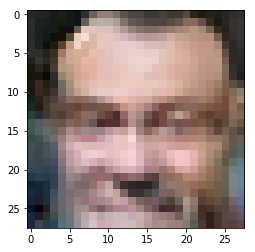

In [30]:
noise = K.random_uniform_variable((1,100), -1, 1)
i = Gen.predict(noise, steps=1)
im = (((i - i.min()) * 255) / (i.max() - i.min())).astype(np.uint8)
plt.imshow(im[0])

## Face 2

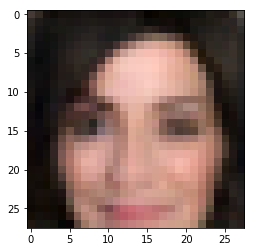

In [20]:
noise2 = K.random_uniform_variable((1,100), -1, 1)
i2 = Gen.predict(noise2, steps=1)
im2 = (((i2 - i2.min()) * 255) / (i2.max() - i2.min())).astype(np.uint8)
plt.imshow(im2[0])

## Face 1 + Face 2

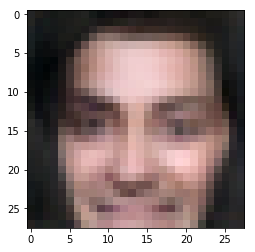

In [31]:
noise3 = (noise + noise2) / 2
i3 = Gen.predict(noise3, steps=1)
im3 = (((i3 - i3.min()) * 255) / (i3.max() - i3.min())).astype(np.uint8)
plt.imshow(im3[0])

## GAN Reverse

In [13]:
def gan_reverse(i, steps = 50):
    z = K.random_uniform_variable((1,100), -1, 1)

    x = K.placeholder()
    loss = K.sum(K.square(i - Gen.outputs[0]))
    grad = K.gradients(loss, Gen.inputs[0])[0]
    update_fn = K.function(Gen.inputs, [grad])

    for step in range(steps):
        j = Gen.predict(z, steps=1)
        for _ in range(5):
            update_vec = update_fn([z, j])[0]
            z -= update_vec * 0.015

        if step % 5 == 0:
            print("Step:", step)
    return z

Step: 0
Step: 5
Step: 10
Step: 15
Step: 20
Step: 25
Step: 30
Step: 35
Step: 40
Step: 45


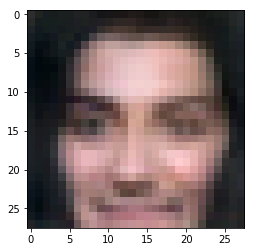

In [32]:
z = gan_reverse(i3)
j = Gen.predict(z, steps=1)
j = (((j - j.min()) * 255) / (j.max() - j.min())).astype(np.uint8)
plt.imshow(j[0])